<a href="https://colab.research.google.com/github/ShowBaba/Machine-Learning-/blob/master/steps_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [0]:
# load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
z = test_df['EmployeeNo']
train_df.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [0]:
train_df.shape

(38312, 19)

In [0]:
test_df.shape

(16496, 18)

In [0]:
y = train_df.iloc[:, -1]

In [0]:
# merge the datasets for processing
df = [train_df, test_df]
df = pd.concat(df, keys=['a', 'b'], sort=False)
df = df.drop(columns=['EmployeeNo', 'Promoted_or_Not'])
df.head(10)

Division        Qualification  Gender  \
a 0         Commercial Sales and Marketing     MSc, MBA and PhD  Female   
  1  Customer Support and Field Operations  First Degree or HND    Male   
  2         Commercial Sales and Marketing  First Degree or HND    Male   
  3         Commercial Sales and Marketing  First Degree or HND    Male   
  4               Information and Strategy  First Degree or HND    Male   
  5  Customer Support and Field Operations  First Degree or HND  Female   
  6  Customer Support and Field Operations     MSc, MBA and PhD    Male   
  7               Information and Strategy  First Degree or HND    Male   
  8         Commercial Sales and Marketing     MSc, MBA and PhD    Male   
  9         Commercial Sales and Marketing  First Degree or HND  Female   

      Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
a 0  Direct Internal process                   2           1986   
  1        Agency and others                   2           1991   
  2  Direct Internal process                   2           1987   
  3        Agency and others                   3           1982   
  4  Direct Internal process                   3           1990   
  5        Agency and others                   2           1990   
  6  Direct Internal process                   2           1988   
  7        Agency and others                   2           1993   
  8  Direct Internal process                   2           1989   
  9  Direct Internal process                   2           1986   

     Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
a 0                    12.5                 2011            1               0   
  1                    12.5                 2015            0               0   
  2                     7.5                 2012            0               0   
  3                     2.5                 2009            0               0   
  4                     7.5                 2012            0               0   
  5                     7.5                 2014            0               0   
  6                     7.5                 2013            0               0   
  7                    10.0                 2014            0               0   
  8                    12.5                 2014            1               0   
  9                    12.5                 2016            1               0   

     Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
a 0                      41         ANAMBRA               No        Married   
  1                      52         ANAMBRA              Yes        Married   
  2                      42         KATSINA              Yes        Married   
  3                      42           NIGER              Yes         Single   
  4                      77       AKWA IBOM              Yes        Married   
  5                      51           ENUGU              Yes        Married   
  6                      55             OYO               No         Single   
  7                      75           LAGOS              Yes        Married   
  8                      46            ONDO              Yes        Married   
  9                      42           LAGOS              Yes        Married   

    Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
a 0                       No                                  No   
  1                       No                                  No   
  2                       No                                  No   
  3                       No                                  No   
  4                       No                                  No   
  5                       No                                 Yes   
  6                       No                                  No   
  7                       No                                  No   
  8                       No                                  No   
  9                       No

In [0]:
df.shape

(54808, 17)

In [0]:
# get columns
df.columns

Index(['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers'],
      dtype='object')

In [0]:
# check for unique values in each columns
df['Previous_IntraDepartmental_Movement'].unique()

array(['No', 'Yes'], dtype=object)

In [0]:
# Trainings_Attended, Year_of_birth, Previous_Award, Training_score_average, State_Of_Origin, Past_Disciplinary_Action

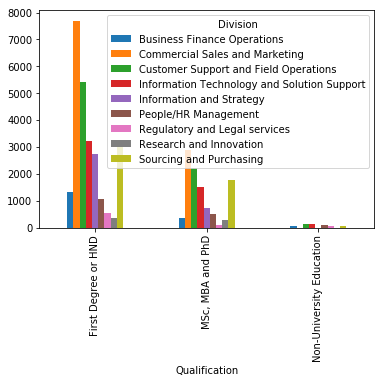

In [0]:
pd.crosstab(train_df.Qualification, train_df.Division).plot(kind='bar')

In [0]:
df.isnull().sum()

Division                                  0
Qualification                          2409
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
dtype: int64

In [0]:
# filling the null values based on the "Division " column
df_null = df.groupby('Division').Qualification.transform(lambda x: x.fillna(x.mode()[0]))

In [0]:
# dropping the "Qualification" column that has null values and adding the clean coolumn
df = df.drop(columns=['Qualification'])
df['Qualification'] = df_null  

In [0]:
# Encoding
df = pd.get_dummies(df)
df.head()

Trainings_Attended  Year_of_birth  Last_performance_score  \
a 0                   2           1986                    12.5   
  1                   2           1991                    12.5   
  2                   2           1987                     7.5   
  3                   3           1982                     2.5   
  4                   3           1990                     7.5   

     Year_of_recruitment  Targets_met  Previous_Award  Training_score_average  \
a 0                 2011            1               0                      41   
  1                 2015            0               0                      52   
  2                 2012            0               0                      42   
  3                 2009            0               0                      42   
  4                 2012            0               0                      77   

     Division_Business Finance Operations  \
a 0                                     0   
  1                                     0   
  2                                     0   
  3                                     0   
  4                                     0   

     Division_Commercial Sales and Marketing  \
a 0                                        1   
  1                                        0   
  2                                        1   
  3                                        1   
  4                                        0   

     Division_Customer Support and Field Operations  ...  \
a 0                                               0  ...   
  1                                               1  ...   
  2                                               0  ...   
  3                                               0  ...   
  4                                               0  ...   

     No_of_previous_employers_0  No_of_previous_employers_1  \
a 0                           1                           0   
  1                           1                           0   
  2                           1                           0   
  3                           0                           1   
  4                           0                           1   

     No_of_previous_employers_2  No_of_previous_employers_3  \
a 0                           0                           0   
  1                           0                           0   
  2                           0                           0   
  3                           0                           0   
  4                           0                           0   

     No_of_previous_employers_4  No_of_previous_employers_5  \
a 0                           0                           0   
  1                           0                           0   
  2                           0                           0   
  3                           0                           0   
  4                           0                           0   

     No_of_previous_employers_More than 5  Qualification_First Degree or HND  \
a 0                                     0                                  0   
  1                                     0                                  1   
  2                                     0                                  1   
  3                                     0                                  1   
  4                                     0                                  1   

     Qualification_MSc, MBA and PhD  Qualification_Non-University Education  
a 0                               1                                       0  
  1                               0                                       0  
  2                               0                                       0  
  3                               0                                       0  
  4                               0                                       0  

[5 rows x 77 columns]

In [0]:
# splitting the dataset back to test and train using the keys 'x' & 'y'
train_df = df.loc['a']
test_df = df.loc['b']

In [0]:
X = train_df.iloc[:, :]
Z = test_df.iloc[:,:]

NameError: name 'train_df' is not defined

In [0]:
# feature extraction with Recursive Feature Elimination (RFE)

import time
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

start_time = time.time()
logreg = LogisticRegression()

rfe = RFE(logreg, 45)
rfe = rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)
print(len(rfe.support_))

print(f'Done in {time.time() - start_time} seconds')

[ True False False False  True  True  True  True  True  True  True  True
  True  True  True  True False False False False  True  True  True  True
  True False False  True False False False  True False False False  True
  True False  True  True False  True  True  True  True False False  True
  True  True  True False False False  True  True  True False False False
 False  True  True  True  True  True  True False False False False False
  True False  True  True  True]
[ 1 14  9 13  1  1  1  1  1  1  1  1  1  1  1  1 22 30 26 17  1  1  1  1
  1  5 19  1 21 23  8  1 12 24  2  1  1 15  1  1  4  1  1  1  1 16 11  1
  1  1  1 25  3 31  1  1  1 28 27 32 33  1  1  1  1  1  1 18 20 29  7  6
  1 10  1  1  1]
77
Done in 19.460365295410156 seconds


In [0]:
cols = ['Qualification_MSc, MBA and PhD',
       'Qualification_Non-University Education', 'No_of_previous_employers_More than 5', 'Marital_Status_Single',
       'Past_Disciplinary_Action_No', 'Past_Disciplinary_Action_Yes',
       'Previous_IntraDepartmental_Movement_No',
       'Previous_IntraDepartmental_Movement_Yes', 'No_of_previous_employers_0','State_Of_Origin_TARABA', 'State_Of_Origin_YOBE',
       'State_Of_Origin_ZAMFARA', 'State_Of_Origin_SOKOTO',
       'State_Of_Origin_TARABA', 'State_Of_Origin_PLATEAU',
       'State_Of_Origin_RIVERS', 'State_Of_Origin_OGUN', 'State_Of_Origin_KWARA', 'State_Of_Origin_IMO',
       'State_Of_Origin_JIGAWA', 'State_Of_Origin_KADUNA',
       'State_Of_Origin_KANO', 'State_Of_Origin_KATSINA', 'State_Of_Origin_ABIA', 'State_Of_Origin_ADAMAWA',
       'State_Of_Origin_AKWA IBOM', 'State_Of_Origin_ANAMBRA',
       'State_Of_Origin_BAUCHI', 'State_Of_Origin_BAYELSA',
       'State_Of_Origin_BENUE', 'State_Of_Origin_BORNO',
       'State_Of_Origin_CROSS RIVER', 'State_Of_Origin_DELTA',
       'State_Of_Origin_EBONYI', 'State_Of_Origin_EDO', 'Trainings_Attended']

In [0]:
df = df[cols]

In [0]:
df.shape

(54808, 36)

In [0]:
train_df = df.loc['a']
test_df = df.loc['b']

In [0]:
test_df.shape

(16496, 36)

In [0]:
X = train_df.iloc[:, :]
Z = test_df.iloc[:,:]

In [0]:
X.head()

,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,No_of_previous_employers_More than 5,Marital_Status_Single,Past_Disciplinary_Action_No,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,State_Of_Origin_TARABA,...,State_Of_Origin_ANAMBRA,State_Of_Origin_BAUCHI,State_Of_Origin_BAYELSA,State_Of_Origin_BENUE,State_Of_Origin_BORNO,State_Of_Origin_CROSS RIVER,State_Of_Origin_DELTA,State_Of_Origin_EBONYI,State_Of_Origin_EDO,Trainings_Attended
0,1,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,2
1,0,0,0,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,2
2,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary()) 

         Current function value: 0.288861
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        Promoted_or_Not   No. Observations:                38312
Model:                          Logit   Df Residuals:                    38278
Method:                           MLE   Df Model:                           33
Date:                Fri, 08 Nov 2019   Pseudo R-squ.:                0.003416
Time:                        15:42:58   Log-Likelihood:                -11067.
converged:                      False   LL-Null:                       -11105.
                                        LLR p-value:                 3.171e-05
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Qualification_MSc, MBA and PhD              0.2012      0.040      5.035      0.000   

C:\Users\SAMUEL PC\Anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [0]:
import xgboost as xgb
import time


start_time = time.time()
clf = xgb.XGBClassifier(max_depth=5,
                n_estimators=2500,
                learning_rate=0.1, 
                colsample_bytree=0.9,
                min_child_weight = 3,
                seed=1200,
                booster='dart'
                
                )
                
clf.fit(X_train, y_train, early_stopping_rounds=50, eval_metric="auc",
        eval_set=[(X_train, y_train), (X_test, y_test)])

pred = clf.predict(X_test)
print(f'Done in {time.time() - start_time} seconds')

ValueError: feature_names must be unique